In [1]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def map_score(dataframe,customers,prob):
    dataframe['Propensity'] = 0
    for i in range(len(dataframe)):
        idx = dataframe.index[i]
        for j in range(len(customers)):
            if dataframe.loc[idx,'Client'] == customers[j]:
                dataframe.loc[idx, "Propensity"] = prob[j]

In [5]:
df_kbc_bank = pd.read_csv(r"\bank.csv")
df_kbc_bank.head() 

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1,F,51,7,1,0,0,1,0,0,...,30.0,3.0,12.0,9.0,1.0,0.0,0.0,26.972679,0.0,0.0
1,2,M,43,152,1,1,0,0,0,0,...,6.0,2.0,2.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,3,M,17,140,1,0,1,0,0,0,...,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,M,24,153,1,1,0,0,1,0,...,36.0,6.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,F,58,200,1,1,0,0,0,0,...,41.0,4.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_kbc_bank.columns

Index(['Client', 'Sex', 'Age', 'Tenure', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL', 'VolumeCred',
       'VolumeCred_CA', 'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb',
       'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL'],
      dtype='object')

In [7]:
df_kbc_bank['Client'].nunique()

1615

In [8]:
cust_req = pd.DataFrame({'Category': {0: 'Credit', 1: 'Loan',2:'Mutual Fund'}, 'Sum': {0: float(df_kbc_bank[["Sale_CC"]].sum()),
1:float(df_kbc_bank[["Sale_CL"]].sum()),2:float(df_kbc_bank[["Sale_MF"]].sum()) }})

In [9]:
cust_req.head()

,Category,Sum
0,Credit,242.0
1,Loan,290.0
2,Mutual Fund,193.0


Text(0, 0.5, 'Products for Marketing')

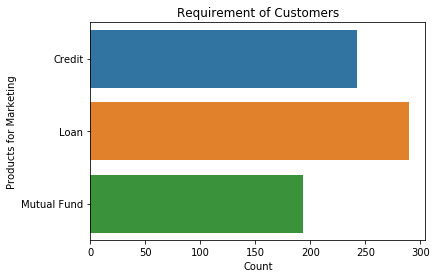

In [10]:
sns.barplot(x = 'Sum', y = 'Category', data = cust_req)
plt.title('Requirement of Customers')
plt.xlabel('Count')
plt.ylabel('Products for Marketing')

In [11]:
df_kbc_bank = df_kbc_bank.dropna()
corr = df_kbc_bank.corr()
corr.sort_values(["Sale_CL"], ascending = False, inplace = True)
print(corr.Sale_CL)

Sale_CL                         1.000000
Revenue_CL                      0.709623
Tenure                          0.182954
TransactionsCred_CA             0.084930
TransactionsCred                0.083528
Count_CA                        0.083067
TransactionsDebCash_Card        0.076641
ActBal_MF                       0.073530
TransactionsDeb                 0.068460
ActBal_OVD                      0.066445
TransactionsDeb_CA              0.064593
VolumeDeb                       0.061754
Count_CL                        0.052065
VolumeDeb_PaymentOrder          0.051462
ActBal_CL                       0.050732
TransactionsDeb_PaymentOrder    0.049147
Client                          0.044932
Count_MF                        0.044770
VolumeDeb_CA                    0.039795
VolumeDebCashless_Card          0.038015
Count_OVD                       0.035477
Count_SA                        0.028808
VolumeDebCash_Card              0.015739
TransactionsDebCashless_Card    0.014826
Revenue_MF      

In [12]:
data_loan = df_kbc_bank[['Tenure','TransactionsCred_CA','Count_CA','TransactionsCred','TransactionsDebCash_Card','ActBal_CC','Age','Client','Sale_CL','Revenue_CL']]
#len(data_loan)
data_loan.head()

,Tenure,TransactionsCred_CA,Count_CA,TransactionsCred,TransactionsDebCash_Card,ActBal_CC,Age,Client,Sale_CL,Revenue_CL
0,7,23.0,1,25.0,3.0,0.0,51,1,0.0,0.0
1,152,3.0,1,4.0,2.0,0.0,43,2,0.0,0.0
5,19,2.0,1,3.0,1.0,0.0,24,6,0.0,0.0
7,30,21.0,1,25.0,10.0,0.0,64,8,0.0,0.0
12,132,3.0,1,6.0,6.0,0.0,66,13,0.0,0.0


In [13]:
X = data_loan.loc[:,'Tenure':'Client'].values # as_matrix() is deprecated hence replaced with .values 
y = data_loan.Sale_CL.values

Text(0.5, 1, 'Correlation between the selected Features')

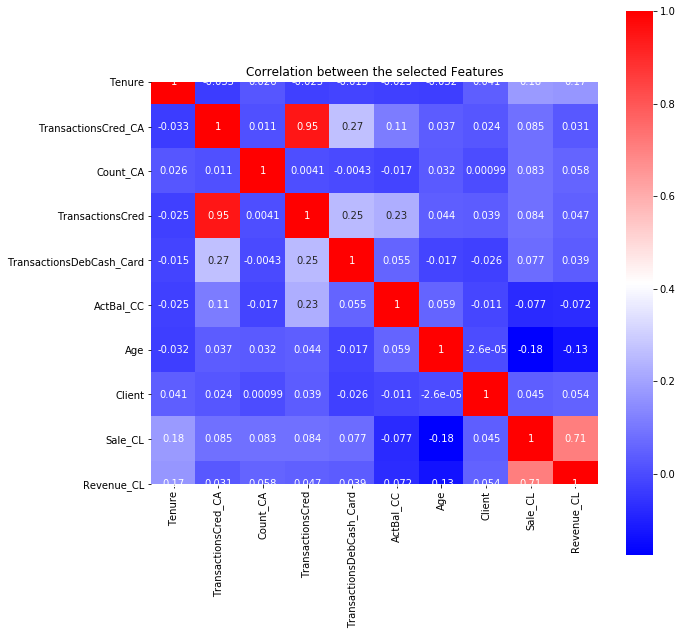

In [18]:
Corr_Loan = data_loan.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr_Loan, vmax=1, square=True,annot=True,cmap='bwr')
plt.title('Correlation between the selected Features')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)

In [23]:
logistic = linear_model.LogisticRegression(penalty='l2',C=1,class_weight='balanced')
logistic = logistic.fit(X_train, y_train)
print("Accuracy = "+str(logistic.score(X_test,y_test)))

Accuracy = 0.6153846153846154


D:\ANACONDA\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
pscore = logistic.predict_proba(X_test)[:,1]  # The predicted propensities by the model
pscore

array([0.53433696, 0.25043537, 0.64653443, 0.64766277, 0.75022929,
       0.49377462, 0.56752413, 0.57417542, 0.51814938, 0.32648856,
       0.12900529, 0.47238466, 0.5851252 , 0.381038  , 0.32453833,
       0.40084125, 0.47581843, 0.5150673 , 0.57834667, 0.66795012,
       0.40479753, 0.58787001, 0.55146391, 0.22415417, 0.46101888,
       0.67874253, 0.62917276, 0.60815699, 0.23121693, 0.42794418,
       0.46159649, 0.51800097, 0.42286203, 0.48227248, 0.14357637,
       0.47884065, 0.44077526, 0.58040645, 0.7648621 , 0.40446181,
       0.38327556, 0.42445593, 0.28773008, 0.40128822, 0.28626701,
       0.41547254, 0.46531698, 0.31097373, 0.41916125, 0.62304697,
       0.34442909, 0.4902759 , 0.57839496, 0.60143444, 0.42569899,
       0.61765475, 0.55020775, 0.3175495 , 0.60867287, 0.71753399,
       0.46097869, 0.80789579, 0.61353194, 0.68474981, 0.27539556,
       0.63037878, 0.73415453, 0.17633841, 0.40028843, 0.28120634,
       0.45435846, 0.31745607, 0.63837503, 0.45726166, 0.46497

In [25]:
Clients = X_test[:,-1]

In [26]:
data_loan.head()

,Tenure,TransactionsCred_CA,Count_CA,TransactionsCred,TransactionsDebCash_Card,ActBal_CC,Age,Client,Sale_CL,Revenue_CL
0,7,23.0,1,25.0,3.0,0.0,51,1,0.0,0.0
1,152,3.0,1,4.0,2.0,0.0,43,2,0.0,0.0
5,19,2.0,1,3.0,1.0,0.0,24,6,0.0,0.0
7,30,21.0,1,25.0,10.0,0.0,64,8,0.0,0.0
12,132,3.0,1,6.0,6.0,0.0,66,13,0.0,0.0


In [28]:
map_score(data_loan,Clients,pscore)

D:\ANACONDA\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ANACONDA\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
# Remove records where the Target sale value is 0
data_loan =data_loan[(data_loan.Sale_CL != 0)]
# Remove cases where probability is 0
data_loan = data_loan[(data_loan.Propensity != 0)]
# Remove the non essential fields 
data_loan = data_loan[['Client','Sale_CL','Revenue_CL','Propensity']]
# Sort the values by Decreasing order of Propensity, so that the clients with the highest propensity can be targeted first
Clients_loan = data_loan.sort_values(by ='Propensity',ascending=False)

In [34]:
data_loan.head()

,Client,Sale_CL,Revenue_CL,Propensity
101,102,1.0,6.952500,0.845450
119,120,1.0,7.297857,0.419161
122,123,1.0,10.461071,0.557634
191,192,1.0,6.857143,0.301705
387,388,1.0,7.285714,0.515067


In [42]:
corr.sort_values(["Sale_CC"], ascending = False, inplace = True)
print(corr.Sale_CC)

Sale_CC                         1.000000
Revenue_CC                      0.266128
ActBal_SA                       0.178872
ActBal_CA                       0.162126
Count_SA                        0.109100
VolumeDeb_PaymentOrder          0.078926
TransactionsDebCash_Card        0.067147
Revenue_CL                      0.061286
VolumeDeb                       0.056011
VolumeDeb_CA                    0.048978
Count_OVD                       0.045900
Age                             0.044275
TransactionsCred                0.033397
Tenure                          0.015186
VolumeCred                      0.015178
TransactionsCred_CA             0.007702
TransactionsDeb                -0.000098
Revenue_MF                     -0.001863
VolumeCred_CA                  -0.002583
Client                         -0.003112
TransactionsDeb_CA             -0.009415
VolumeDebCash_Card             -0.009527
TransactionsDeb_PaymentOrder   -0.009810
Count_CC                       -0.011186
VolumeDebCashles

In [43]:
data_credit = df_kbc_bank[['ActBal_SA','ActBal_CA','Count_SA','VolumeDeb_PaymentOrder','TransactionsDebCash_Card','ActBal_CC','Count_CC','Client','Sale_CC','Revenue_CC']]
data_credit.head()

,ActBal_SA,ActBal_CA,Count_SA,VolumeDeb_PaymentOrder,TransactionsDebCash_Card,ActBal_CC,Count_CC,Client,Sale_CC,Revenue_CC
0,0.00000,1333.802857,0,247.607143,3.0,0.0,0,1,0.0,0.0
1,13326.19036,110.768571,1,35.714286,2.0,0.0,0,2,0.0,0.0
5,0.00000,4.297143,0,0.000000,1.0,0.0,0,6,0.0,0.0
7,0.00000,0.000000,0,0.000000,10.0,0.0,0,8,0.0,0.0
12,5.83250,353.839643,1,312.535714,6.0,0.0,0,13,0.0,0.0


In [44]:
X = data_credit.loc[:,'ActBal_SA':'Client'].values
y = data_credit.Sale_CC.values

Text(0.5, 1, 'Correlation between the selected Features')

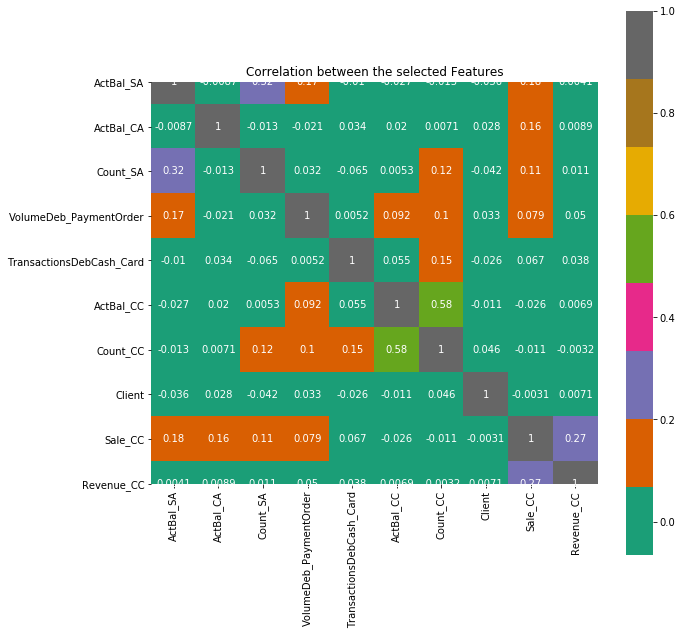

In [45]:
Corr_Credit = data_credit.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr_Credit, vmax=1, square=True,annot=True,cmap='Dark2')
plt.title('Correlation between the selected Features')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.7272727272727273


In [47]:
pscore = clf.predict_proba(X_test)[:,1]

In [52]:
map_score(data_credit,Clients,pscore)

D:\ANACONDA\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ANACONDA\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [53]:
# Remove records where the Target sale value is 0
data_credit =data_credit[(data_credit.Sale_CC != 0)]
# Remove cases where probability is 0
data_credit = data_credit[(data_credit.Propensity != 0)]
# Remove the non essential fields 
data_credit = data_credit[['Client','Sale_CC','Revenue_CC','Propensity']]
# Sort the values by Decreasing order of Propensity, so that the clients with the highest propensity can be targeted first
Clients_credit = data_credit.sort_values(by ='Propensity',ascending=False)

In [57]:
Clients_credit.head()

,Client,Sale_CC,Revenue_CC,Propensity
48,49,1.0,15.246429,0.7
617,618,1.0,18.571429,0.7
1366,1367,1.0,5.177143,0.7
1301,1302,1.0,0.428571,0.5
454,455,1.0,18.292143,0.5


In [59]:
corr.sort_values(["Sale_MF"], ascending = False, inplace = True)
print(corr.Sale_MF)

Sale_MF                         1.000000
Revenue_MF                      0.387523
Count_MF                        0.164022
TransactionsDebCashless_Card    0.124785
TransactionsDeb                 0.082344
TransactionsCred_CA             0.081178
TransactionsCred                0.073415
TransactionsDeb_CA              0.053990
ActBal_MF                       0.024952
TransactionsDeb_PaymentOrder    0.023112
VolumeCred_CA                   0.015664
Client                          0.011345
ActBal_CC                       0.010573
Revenue_CL                      0.004459
VolumeDebCashless_Card          0.002175
Count_CA                        0.001232
ActBal_OVD                     -0.001809
TransactionsDebCash_Card       -0.002194
Count_CC                       -0.003033
VolumeCred                     -0.003425
Tenure                         -0.005661
Count_SA                       -0.006532
Count_OVD                      -0.012146
VolumeDeb_PaymentOrder         -0.012781
Sale_CL         

In [60]:
data_mutual_fund = df_kbc_bank[['Count_MF','TransactionsDebCashless_Card','TransactionsDeb','TransactionsCred_CA'             
,'TransactionsCred','TransactionsDeb_CA','ActBal_MF',
'TransactionsDeb_PaymentOrder','VolumeCred_CA','Client','Sale_MF','Revenue_MF']]
data_mutual_fund.head()

,Count_MF,TransactionsDebCashless_Card,TransactionsDeb,TransactionsCred_CA,TransactionsCred,TransactionsDeb_CA,ActBal_MF,TransactionsDeb_PaymentOrder,VolumeCred_CA,Client,Sale_MF,Revenue_MF
0,0,12.0,50.0,23.0,25.0,30.0,0.0,9.0,1318.698214,1,1.0,26.972679
1,0,2.0,6.0,3.0,4.0,6.0,0.0,1.0,704.935714,2,0.0,0.000000
5,0,0.0,8.0,2.0,3.0,6.0,0.0,0.0,448.429286,6,0.0,0.000000
7,0,1.0,42.0,21.0,25.0,24.0,0.0,0.0,458.608571,8,0.0,0.000000
12,0,17.0,41.0,3.0,6.0,39.0,0.0,10.0,1095.644643,13,0.0,0.000000


In [61]:
X = data_mutual_fund.loc[:,'Count_MF':'Client'].values
y = data_mutual_fund.Sale_MF.values

Text(0.5, 1, 'Correlation between the selected Features')

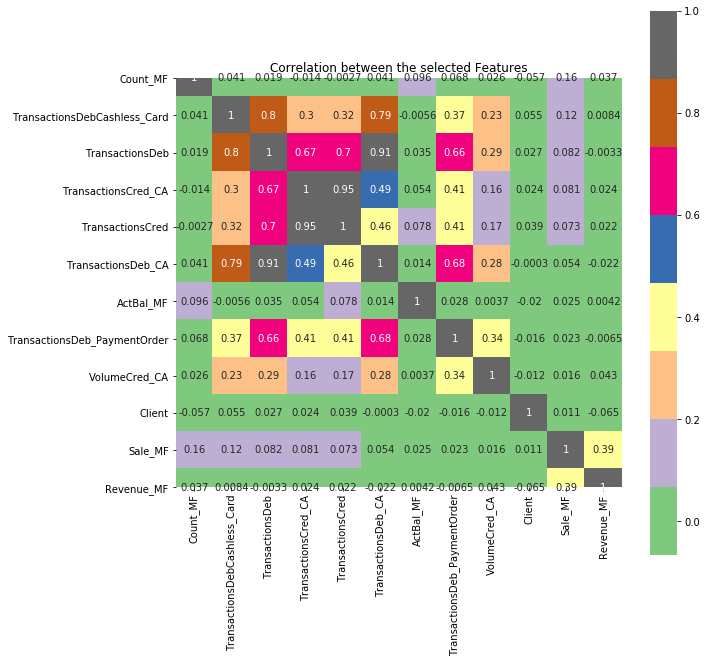

In [62]:
Corr_Mutual_Fund = data_mutual_fund.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr_Mutual_Fund, vmax=1, square=True,annot=True,cmap='Accent')
plt.title('Correlation between the selected Features')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
print(clf.score(X_test,y_test))

0.7132867132867133


In [65]:
pscore = clf.predict_proba(X_test)[:,1]
Clients = X_test[:,-1]
map_score(data_mutual_fund,Clients,pscore)

D:\ANACONDA\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ANACONDA\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [66]:
data_mutual_fund.head()

,Count_MF,TransactionsDebCashless_Card,TransactionsDeb,TransactionsCred_CA,TransactionsCred,TransactionsDeb_CA,ActBal_MF,TransactionsDeb_PaymentOrder,VolumeCred_CA,Client,Sale_MF,Revenue_MF,Propensity
0,0,12.0,50.0,23.0,25.0,30.0,0.0,9.0,1318.698214,1,1.0,26.972679,0.0
1,0,2.0,6.0,3.0,4.0,6.0,0.0,1.0,704.935714,2,0.0,0.000000,0.0
5,0,0.0,8.0,2.0,3.0,6.0,0.0,0.0,448.429286,6,0.0,0.000000,0.0
7,0,1.0,42.0,21.0,25.0,24.0,0.0,0.0,458.608571,8,0.0,0.000000,0.0
12,0,17.0,41.0,3.0,6.0,39.0,0.0,10.0,1095.644643,13,0.0,0.000000,0.0


In [67]:
# Remove records where the Target sale value is 0
data_mutual_fund =data_mutual_fund[(data_mutual_fund.Sale_MF != 0)]
# Remove cases where probability is 0
data_mutual_fund = data_mutual_fund[(data_mutual_fund.Propensity != 0)]
# Remove the non essential fields 
data_mutual_fund = data_mutual_fund[['Client','Sale_MF','Revenue_MF','Propensity']]
# Sort the values by Decreasing order of Propensity, so that the clients with the highest propensity can be targeted first
Clients_mutual_fund = data_mutual_fund.sort_values(by ='Propensity',ascending=False)

In [68]:
Clients_mutual_fund.head()

,Client,Sale_MF,Revenue_MF,Propensity
101,102,1.0,2.958036,1.000000
1229,1230,1.0,1.547500,0.999995
1495,1496,1.0,5.771250,0.999851
41,42,1.0,15.275714,0.999811
1316,1317,1.0,5.987679,0.896646


In [69]:
data_credit.rename(columns={'Revenue_CC': 'Revenue'}, inplace=True)
data_loan.rename(columns={'Revenue_CL': 'Revenue'}, inplace=True)
data_mutual_fund.rename(columns={'Revenue_MF': 'Revenue'}, inplace=True)
print("Revenue From sale of Credit Card   = " +str(data_credit.Revenue.sum()))
print("Revenue From sale of Consumer Loan = " +str(data_loan.Revenue.sum()))
print("Revenue From sale of Mutual Fund   = " +str(data_mutual_fund.Revenue.sum()))
print("Total best case Revenue = " +str(data_credit.Revenue.sum() + data_loan.Revenue.sum() + data_mutual_fund.Revenue.sum()))

Revenue From sale of Credit Card   = 225.463571427
Revenue From sale of Consumer Loan = 497.7578571719999
Revenue From sale of Mutual Fund   = 265.494107137
Total best case Revenue = 988.7155357359999


In [80]:
Consolidated_data = data_credit[["Client","Revenue",'Propensity']].copy()
Consolidated_data['Category'] = 'Credit'
Consolidated_data = Consolidated_data.append(data_loan, sort = True)
Consolidated_data = Consolidated_data[['Category','Client','Revenue','Propensity']]
Consolidated_data = Consolidated_data.fillna('Loan')
Consolidated_data = Consolidated_data.append(data_mutual_fund)
Consolidated_data = Consolidated_data[['Category','Client','Revenue','Propensity']]
Consolidated_data = Consolidated_data.fillna('mutual_fund')
Consolidated_data['Propensity'] = pd.to_numeric(Consolidated_data['Propensity'])

In [82]:
Consolidated_data.head()

,Category,Client,Revenue,Propensity
48,Credit,49,15.246429,0.7
95,Credit,96,6.107143,0.2
130,Credit,131,4.642857,0.2
350,Credit,351,3.607143,0.2
373,Credit,374,76.859286,0.1


In [83]:
Consolidated_data['Category'].value_counts()

Loan           44
mutual_fund    33
Credit         25
Name: Category, dtype: int64

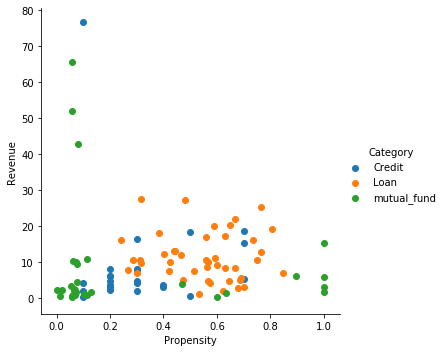

In [84]:
sns.FacetGrid(Consolidated_data, hue="Category", height=5) \
   .map(plt.scatter, "Propensity", "Revenue") \
   .add_legend()

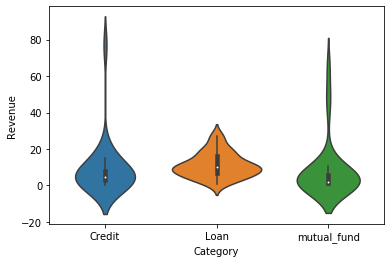

In [85]:
sns.violinplot(x="Category", y="Revenue", data=Consolidated_data, size=6)

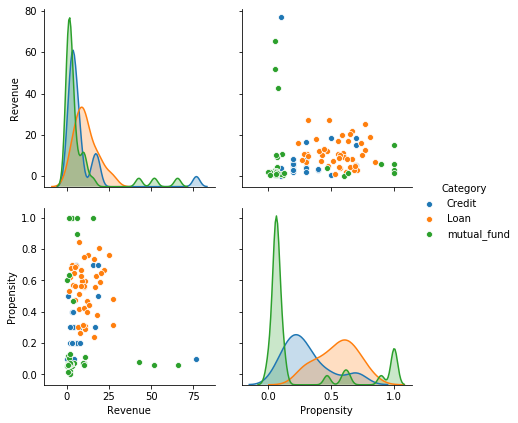

In [86]:
sns.pairplot(Consolidated_data.drop("Client", axis=1), hue="Category", height=3)

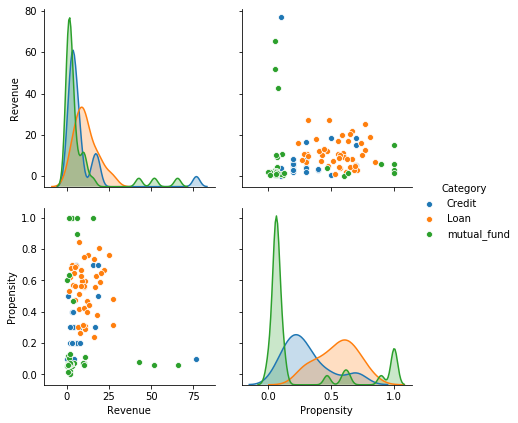

In [87]:
sns.pairplot(Consolidated_data.drop("Client", axis=1), hue="Category", height=3, diag_kind="kde")

In [88]:
CallTheseClients = Consolidated_data[(Consolidated_data.Propensity >= 0.60)]
CallTheseClients = CallTheseClients.sort_values(by =['Category','Propensity'],ascending=False)
CallTheseClients

,Category,Client,Revenue,Propensity
101,mutual_fund,102,2.958036,1.000000
1229,mutual_fund,1230,1.547500,0.999995
1495,mutual_fund,1496,5.771250,0.999851
41,mutual_fund,42,15.275714,0.999811
1316,mutual_fund,1317,5.987679,0.896646
910,mutual_fund,911,1.269643,0.634898
597,mutual_fund,598,0.163571,0.601549
101,Loan,102,6.952500,0.845450
774,Loan,775,19.035714,0.807896
1258,Loan,1259,12.659286,0.764871
